In [1]:
## will test correlation between GLM and LM p-values ##
## this gives a rough idea of whether models are doing the same thing ## 

In [2]:
import pandas as pd

In [21]:
GLM_data = pd.read_csv("DiffExp_Q4.00_100821.csv")
LM_data = pd.read_csv("killifish_human_ortho_regresson_table_Q4.00_290701.csv")
ortho = pd.read_csv("killifish_human_ortho.csv")

In [26]:
GLM_data = GLM_data[['Unnamed: 0', 'pvalue']]

In [27]:
LM_data = LM_data[['GENE', 'p.value']]

In [23]:
ortho_dict = dict(zip(ortho['Gene.stable.ID'], ortho['Gene.stable.ID.1']))

In [29]:
GLM_data['Unnamed: 0'] = GLM_data['Unnamed: 0'].map(ortho_dict)

<ipython-input-29-d187f5d5a04f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GLM_data['Unnamed: 0'] = GLM_data['Unnamed: 0'].map(ortho_dict)


In [32]:
GLM_data = GLM_data.dropna()

In [35]:
import matplotlib.pyplot as plt

In [43]:
GLM_data = GLM_data.drop_duplicates(subset='Unnamed: 0')

In [50]:
GLM_data = GLM_data.sort_values(by='Unnamed: 0')
LM_data = LM_data.sort_values(by='GENE')

In [57]:
gene_list = LM_data['GENE']

In [60]:
GLM_data = GLM_data[GLM_data['Unnamed: 0'].isin(gene_list)]

In [61]:
GLM_list = GLM_data['Unnamed: 0']

In [65]:
LM_data = LM_data[LM_data['GENE'].isin(GLM_list)]

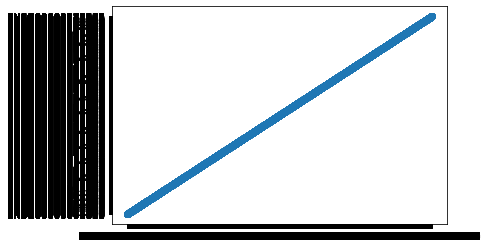

In [68]:
plt.scatter(GLM_data['Unnamed: 0'], LM_data['GENE'])

In [71]:
GLM_data_dict = dict(zip(GLM_data['Unnamed: 0'], GLM_data['pvalue']))

In [72]:
LM_data['GLM'] = LM_data['GENE'].map(GLM_data_dict)

<ipython-input-72-4be04fa366a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LM_data['GLM'] = LM_data['GENE'].map(GLM_data_dict)


In [74]:
LM_data.corr()

,p.value,GLM
p.value,1.000000,0.306486
GLM,0.306486,1.000000
